## Spark foundation internship task1 
### #GRIPNOV

###  Predict the percentage of an student based on the number of study hours. 

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the data from the given website
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
#to check whether any data is missing
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#This will show how the two features are related i.e hours and scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


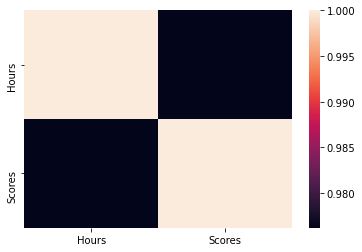

In [8]:
#we can also visualize this 
sns.heatmap(data.corr())

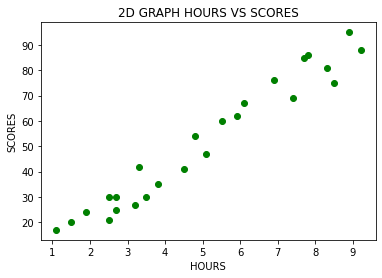

In [9]:
#we can use scatter plot to visualize the table
plt.scatter(data['Hours'],data['Scores'],c='g')
plt.title('2D GRAPH HOURS VS SCORES')
plt.xlabel('HOURS')
plt.ylabel('SCORES')
plt.show()

#### we can clearly observe linear dependency of both hours and scores features , hence linear regression is a most suited algorithm that can be applied here

In [10]:
#let us seperate the dependent and independent feature
x = data['Hours'].values
y = data['Scores'].values
x  = x.reshape(-1,1)
y = y.reshape(-1,1)

In [11]:
#to split the datasets for both training and testing purposes
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=0)

## Training the Algorithm

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [13]:
reg.fit(x_train,y_train)

LinearRegression()

In [14]:
print("Coefficient is ",reg.coef_)
print("Intercept is ",reg.intercept_)
l = reg.intercept_ + reg.coef_*x_train

Coefficient is  [[9.91065648]]
Intercept is  [2.01816004]


#### Let us now visualize the line obtained from linear regression and observe how it fits the data.

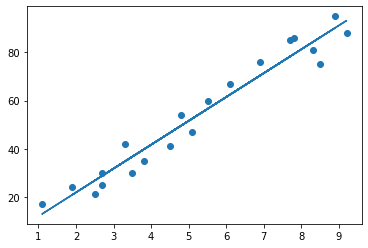

In [15]:
plt.scatter(x_train,y_train)
plt.plot(x_train,l)
plt.show()

#### The line best fits the given datasets .

# Testing the data and check for accuracy

In [16]:
actual = y_test
predicted = reg.predict(x_test)

In [17]:
actual

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [18]:
predicted

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [19]:
from sklearn import metrics
print("Mean squared error :",metrics.mean_squared_error(actual,predicted))

Mean squared error : 21.5987693072174


## What will be predicted score if a student studies for 9.25 hrs/ day? 

In [20]:
x = [[9.25]]
score = reg.predict(x)
print(score)

[[93.69173249]]


#### So , the student would score approximately 94 marks if he study for 9.25hrs/day.

# THANK YOU